## Introduction
Given a dataset with the following information, we will perform a marketing 
analysis on the XYZ company. Below are the following variables/features in 
the dataset:  

- ID _(int)_: customer's unique identifier
- Year_Birth _(int)_: customer's birth year
- Education _(str)_: customer's education level
- Marital_Status _(str)_: marital status (divorced, single, window, married 
etc)
- Income _(str)_: yearly household income
- Kidhome _(int)_: number of children in household
- Teenhome _(int)_: number of teenagers in household
- Dt_Customer _(datetime)_: date of enrollment
- Recency _(int)_: number of days since last purchase
- MntWines _(int)_: amount spent on wine in the last 2 years
- MntFruits _(int)_: amount spent on fruits in the last 2 years
- MntMeatProducts _(int)_: amount spent on meat in the last 2 years
- MntFishProducts _(int)_: amount spent on fish in the last 2 years
- MntSweetProducts _(int)_: amount spent on sweets in the last 2 years
- MntGoldProds _(int)_: amount spent on gold in the last 2 years
- NumDealsPurchases _(int)_: number of purchases made with a discount
- NumWebPurchases _(int)_: number of purchases made through web site
- NumCatalogPurchases _(int)_: number of purchases made using a catalogue
- NumStorePurchases _(int)_: number of purchases made directly in stores
- NumWebVisitsMonth _(int)_: number of visits to web site in the last month
- AcceptedCmp1 _(int)_: 1 if customer accepted the offer in the 1st campaign, 0 
otherwise
- AcceptedCmp2 _(int)_: 1 if customer accepted the offer in the 2nd campaign, 0 
otherwise
- AcceptedCmp3 _(int)_: 1 if customer accepted the offer in the 3rd campaign, 0 
otherwise
- AcceptedCmp4 _(int)_: 1 if customer accepted the offer in the 4th campaign, 0 
otherwise
- AcceptedCmp5 _(int)_: 1 if customer accepted the offer in the 5th campaign, 0 
otherwise
- Response _(int)_: 1 if customer accepted the offer in the last campaign, 0 otherwise
- Complain _(int)_: 1 if customer complained in the last 2 years, 0 otherwise
- Country _(str)_: location of customer

In [36]:
# Prior to analysis, we will clean the data and load modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", 1000)

df = pd.read_csv("marketing_data.csv", sep=",")

# View data
print(df.head(1))

# View data-types
print(df.dtypes)

# Convert categorical data
df.columns = df.columns.str.strip()
df["Education"] = df["Education"].replace(["2n Cycle"], "2n_Cycle")
df["Education"] = df["Education"].astype("category")
df["Marital_Status"] = df["Marital_Status"].astype("category")
df["Country"] = df["Country"].astype("object")
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])

# Encode categorical predictor variables
categorical_columns = ["Education", "Marital_Status"]
for cc in categorical_columns:
    dummies = pd.get_dummies(df[cc])
    dummies = dummies.add_prefix("{}#".format(cc))
    df = df.join(dummies)

# Convert income to int
df["Income"] = df["Income"].replace({"\$": "", ",": ""}, regex=True)
df["Income"] = df["Income"].astype("float")

# Enrollment date
df["Dt_Year"] = df["Dt_Customer"].dt.year
df["Dt_Month"] = df["Dt_Customer"].dt.month
df["Dt_Day"] = df["Dt_Customer"].dt.month

# View updated dataset
print(df.head(1))

     ID  Year_Birth   Education Marital_Status      Income   Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  Complain Country
0  1826        1970  Graduation       Divorced  $84,835.00         0         0     6/16/14        0       189        104              379              111               189           218                  1                4                    4                  6                  1             0             0             0             0             0         1         0      SP
ID                      int64
Year_Birth              int64
Education              object
Marital_Status         object
 Income                object
Kidhome                 int64
Teenhome                int64
Dt_Customer            object


## Market Segmentation
Wine purchase is split into 3 categories, low, medium, high. Low wine purchase is between 0-33% of the
wine column, medium is between 33%-66%, and high is 66% or higher.
<br>
From the three graphs, as a consumer purchases more wine over the 2 year period, they also purchase more
a lot more meat, fish, and sweets. Fruits stayed relatively the same because the cost of fruits isn't too expensive.
Consumers purchasing more products may be attributed to them having a higher disposable income.


*************************
   AVG(MntWines)  AVG(MntFruits)  AVG(MntMeatProducts)  AVG(MntFishProducts)  AVG(MntSweetProducts)  AVG(MntGoldProds)  AVG(NumDealsPurchases)  AVG(NumWebPurchases)  AVG(NumCatalogPurchases)  AVG(NumStorePurchases)  AVG(NumWebVisitsMonth)  AVG(AcceptedCmp3)  AVG(AcceptedCmp4)  AVG(AcceptedCmp5)  AVG(AcceptedCmp1)  AVG(AcceptedCmp2)  AVG(Response)
0     712.190860       47.231183            335.068548             66.751344              49.895161          69.095430                2.293011              6.099462                  5.107527                8.568548                4.220430           0.092742           0.182796           0.200269           0.166667           0.032258       0.240591
0     186.165333       27.342667            143.070667             39.209333              26.124000          50.081333                2.892000              4.426667                  2.466667                5.972000                5.269333           0.053333           0.03866

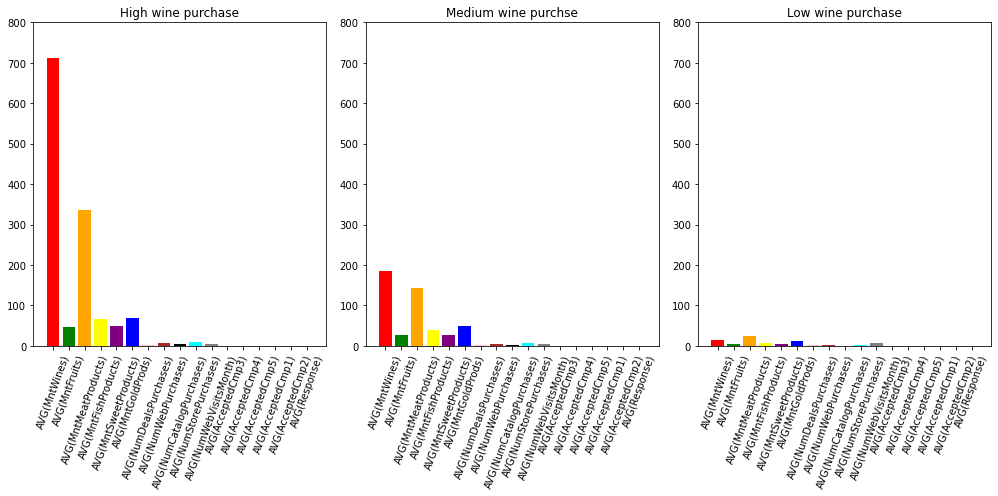

In [37]:
import numpy as np
from sqlalchemy import create_engine

# Load samples.
# Load samples.
import pandas as pd

PATH = '/users/pm/desktop/daydocs/data/'
FILE = 'marketing_data.csv'
data = df
samples = np.array(data[['MntWines']])





def executeSQL(sql, df):
    # This code creates an in-memory table called 'Inventory'.
    engine = create_engine('sqlite://', echo=False)
    connection = engine.connect()
    df.to_sql(name='Marketing', con=connection, if_exists='replace', index=False)

    # This code performs the query.
    queryResult = pd.read_sql(sql, connection)
    return queryResult


def getPercentileValues(df):
    oneThird = df['MntWines'].quantile(0.333)
    twoThird = df['MntWines'].quantile(0.667)
    return oneThird, twoThird


def buildQuery(df, factorColumns):
    print("\n*************************")
    oneThird, twoThirds = getPercentileValues(df)

    # Build select clause.
    select = "SELECT "
    counter = 0
    for colName in factorColumns:
        select += " AVG(" + colName + ")"
        if (counter < len(factorColumns) - 1):
            select += ","
        counter += 1
    select += " FROM Marketing "

    # Query top satisfaction summary
    sql = select + " WHERE MntWines > " + str(twoThirds)
    results1 = executeSQL(sql, df)

    # Query middle satisfaction summary
    sql = select + " WHERE MntWines >= " + str(oneThird) + \
          " AND MntWines <= " + str(twoThirds)
    results2 = executeSQL(sql, df)

    # Query low satisfaction summary
    sql = select + " WHERE MntWines < " + str(oneThird)
    results3 = executeSQL(sql, df)

    summaryDf = results1.copy()
    summaryDf = summaryDf.append(results2)
    summaryDf = summaryDf.append(results3)
    print(summaryDf)
    return results1, results2, results3


factorColumns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
                 'Response']

COLORS = ['red', 'green', 'orange', 'yellow',
          'purple', 'blue', 'pink', 'brown',
          'black', 'cyan', 'gray']

subDf = data[factorColumns]
# print(data['MntWines'])
high, medium, low = buildQuery(subDf, factorColumns)

# Show attribute plots for different satisfaction ranges.
import matplotlib.pyplot as plt

plt.subplots(nrows=1, ncols=3, figsize=(14, 7))

# High satisfaction.
plt.subplot(1, 3, 1)
highTransposed = high.T.reset_index()
plt.bar(highTransposed['index'], highTransposed[0], color=COLORS)
plt.title("High wine purchase")
plt.ylim(0, 800)
plt.xticks(rotation=70)

# Medium satisfaction.
plt.subplot(1, 3, 2)
medTransposed = medium.T.reset_index()
plt.bar(medTransposed['index'], medTransposed[0], color=COLORS)
plt.title("Medium wine purchse")
plt.ylim(0, 800)
plt.xticks(rotation=70)

# Low satisfaction.
plt.subplot(1, 3, 3)
lowTransposed = low.T.reset_index()
plt.bar(lowTransposed['index'], lowTransposed[0], color=COLORS)
plt.title("Low wine purchase")
plt.ylim(0, 800)
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

# Conjoint
The purpose of this survey was to figure out what factors are most important to consumers when
buying wine. The following table are the parameters chosen for the survey.

| Location        | Purchase           | Container  |
| ------------- |:-------------:| -----:|
| Canadian     | Price | bottle |
| Foreign     | Review      |   box|
| BC VQA | Quality     |    bag |

                            OLS Regression Results                            
Dep. Variable:                   Rank   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     29.67
Date:                Fri, 16 Apr 2021   Prob (F-statistic):             0.0330
Time:                        01:27:06   Log-Likelihood:                -1.0583
No. Observations:                   9   AIC:                             16.12
Df Residuals:                       2   BIC:                             17.50
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.5000      0

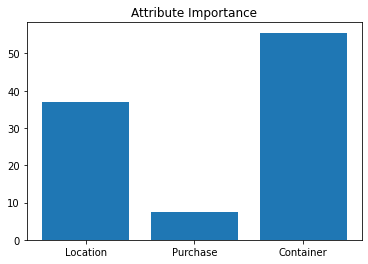

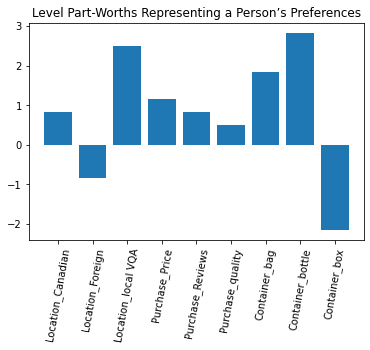

In [38]:
import statsmodels.api as sm

# read in conjoint survey profiles with respondent ranks
df = pd.read_csv('survey_results.csv')

# Show all columns of data frame.
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# This performs a weighted regression for ranking with string variables as
# levels.
attributeNames = [ 'Location', 'Purchase', 'Container']

y = df[['Rank']]
X = df[attributeNames]
X = pd.get_dummies(X, columns =attributeNames )
X = sm.add_constant(X)

lr_model = sm.OLS(y, X).fit()
print(lr_model.summary())

counter     = 0
levelNames  = list(X.keys())# Level names are taken directly from X column names.
levelNames.pop(0)           # Remove constant for intercept.
ranges      = []

# Store all part-worth (utility) values in a list.
# The values are taken directly from the model coefficients.
utilities   = list(lr_model.params)
utilities.pop(0)            # Removes the intercept value.

# Iterate through all attributes to create part-worths.
for attributeName in attributeNames:
    partWorths                 = []

    # Iterate through all levels.
    for levelName in levelNames:
        # If level name contains the attribute store the part worth.
        if(attributeName in levelName):
            partWorth = utilities[counter] # Store corresponding model coefficient.
            print(" :", levelName + ": " + str(partWorth))
            partWorths.append(partWorth)
            counter += 1

    # Summarize utility range for the attribute.
    partWorthRange = max(partWorths) - min(partWorths)
    ranges.append(partWorthRange)

# Calculate relative importance scores for each attribute.
importances = []
for i in range(0, len(ranges)):
    importance = 100*ranges[i]/sum(ranges)
    importances.append(importance)
    print(attributeNames[i] + " importance: " + str(importance))

import matplotlib.pyplot as plt

# Show the importance of each attribute.
plt.bar(attributeNames, importances)
plt.title("Attribute Importance")
plt.show()

# Show user's preference for all levels.
plt.bar(levelNames, utilities)
plt.title("Level Part-Worths Representing a Person’s Preferences")
plt.xticks(rotation=80)
plt.show()

The results of the survey shows that Container is the most important factor taken into consideration
when making a wine purchase. Location of the wine is the second most
important factor.
<br>
This survey represents the team really as we both find container type to be the most important factor.
The results from this survey can potentially benefit companies who want to find out what
potential customers are looking for.